In [22]:
#------------------------------------------------------------------------------------------------------------------
#   Simulated annealing para el problema de las n-reinas
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------
import time
import random
import math

#------------------------------------------------------------------------------------------------------------------
#   Class definitions
#------------------------------------------------------------------------------------------------------------------

class Board(object):
    """ 
        Clase que representa n-reinas colocadas en un tablero de ajedrez. El tablero está representado por una matriz.
         de n filas y dos columnas. Cada fila corresponde a una reina, y las columnas representan
         las coordenadas.
    """
    
    def __init__(self, n, randomize = True):        
        """ 
             Este constructor inicializa el tablero con n reinas.

             n: El número de filas y columnas del ajedrez.
             randomize: True indica que las posiciones iniciales de la reina se eligen al azar.
                        Falso indica que las reinas se colocan en la primera fila.
        """
        self.n = n
        self.queens = []
        if (randomize):
            # Inicializar de forma aleatoria el tablero
            for q in range(n):
                empty_space = False
                while not empty_space:
                    row = random.choice(range(n))
                    col = random.choice(range(n))
                    if not [row, col] in self.queens:
                        empty_space = True;
                self.queens.append([row, col])
        else:
            # Place the queens on the first row
            for q in range(n):
                self.queens.append([0, q])

    def show(self):        
        """ Este método imprime el tablero actual. """               
        for row in range(self.n):
            for col in range(self.n):
                if [row, col] in self.queens:
                    print (' Q ', end = '')
                else:
                    print (' - ', end = '')
            print('')
        print('')
    
    def cost(self):
        """ Este método calcula el costo de esta solución (la cantidad de reinas que no están a salvo). """
        c = 0
        for i in range(self.n):
            queen = self.queens[i]
            safe = True
            for j in range(self.n):
                if i == j:
                    continue
                other_queen = self.queens[j]
                if (queen[0] == other_queen[0]):
                    # Reinas en la misma fila
                    safe = False
                elif (queen[1] == other_queen[1]):
                    # Reinas en la misma columna
                    safe = False
                elif abs(queen[0]-other_queen[0]) == abs(queen[1]-other_queen[1]):
                    # Reinas en la misma diagonal
                    safe = False
            if not safe:
                c += 1
        return c

    def neighbor(self):
        """ Este método devuelve una instancia de tablero como está pero con un movimiento aleatorio realizado. """        
        
        # Copiar tablero actual
        new_board = Board(self.n, False)
        for i in range(self.n):
            new_board.queens[i][0] = self.queens[i][0]
            new_board.queens[i][1] = self.queens[i][1]
             
        # Seleccionar una posicion vacia de manera aleatoria
        valid_position = False
        while not valid_position:            
            new_row = random.choice(range(self.n))
            new_col = random.choice(range(self.n))
            
            valid_position = True
            for q in range(self.n):
                if new_board.queens[q][0] == new_row and new_board.queens[q][1] == new_col:
                    valid_position = False
                    break
        
        # Actualizar una reina seleccionada aleatoriamente
        queen_index = random.choice(range(self.n))
        new_board.queens[queen_index][0] = new_row
        new_board.queens[queen_index][1] = new_col

        return new_board
    
                                       
#------------------------------------------------------------------------------------------------------------------
#   Programa
#------------------------------------------------------------------------------------------------------------------
random.seed(time.time()*1000)

board = Board(8, True)      # Inicializar tablero
board.show()    

cost = board.cost()         # Inicializar costo  
step = 0                    # conteo de pasos

alpha = 0.3333         # coeficiente del exponente de la temperatura (funcion de optimizacion)        
t0 = 8                     # Temperatura inicial
t = t0    

while t > 0.005 and cost > 0:

    # Calcula temperatura
    t = t0 * math.pow(alpha, step)
    step += 1
        
    # obtener vecino aleatorio
    neighbor = board.neighbor()
    new_cost = neighbor.cost()

    # Testear el tabler generado vecino
    if new_cost < cost:
        board = neighbor
        cost = new_cost
    else:
        # Calcular la probabilidad de aceptar el tablero vecino
        p = math.exp(-(new_cost - cost)/t)
        if p >= random.random():
            board = neighbor
            cost = new_cost

    print("Iteracion: ", step, "    Costo: ", cost, "    Temperatura: ", t)

print("--------Solucion-----------")
board.show()         

#------------------------------------------------------------------------------------------------------------------
#  
#------------------------------------------------------------------------------------------------------------------


 -  -  -  -  -  -  Q  - 
 -  Q  Q  -  -  -  -  - 
 -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  - 
 Q  -  Q  -  -  -  -  - 
 -  Q  Q  -  -  -  -  - 
 -  -  -  -  -  -  Q  - 
 -  -  -  -  -  -  -  - 

Iteracion:  1     Costo:  8     Temperatura:  8.0
Iteracion:  2     Costo:  8     Temperatura:  2.6664
Iteracion:  3     Costo:  8     Temperatura:  0.88871112
Iteracion:  4     Costo:  8     Temperatura:  0.29620741629599995
Iteracion:  5     Costo:  8     Temperatura:  0.09872593185145678
Iteracion:  6     Costo:  8     Temperatura:  0.03290535308609054
Iteracion:  7     Costo:  7     Temperatura:  0.010967354183593977
Iteracion:  8     Costo:  7     Temperatura:  0.0036554191493918726
--------Solucion-----------
 -  -  -  Q  -  -  -  - 
 -  -  Q  -  -  -  -  - 
 -  -  -  Q  -  -  -  - 
 -  -  -  -  -  -  -  - 
 -  -  Q  -  -  -  -  - 
 -  Q  Q  -  -  -  -  - 
 -  -  -  -  -  Q  -  - 
 -  Q  -  -  -  -  -  - 



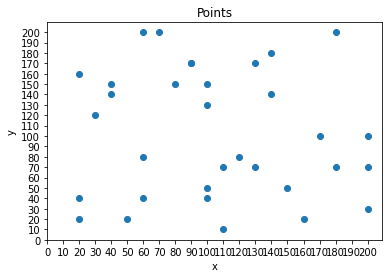

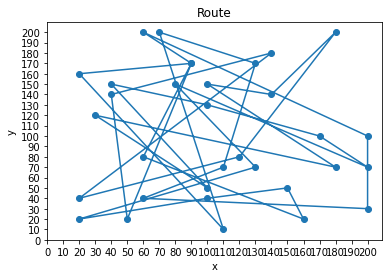

Se han truncado las últimas 5000 líneas del flujo de salida.
Iteration:  68779     Cost:  1000.3863317575023     Temperature:  0.64194432398893
Iteration:  68780     Cost:  1000.3863317575023     Temperature:  0.6419122267727306
Iteration:  68781     Cost:  1000.3863317575023     Temperature:  0.641880131161392
Iteration:  68782     Cost:  1000.3863317575023     Temperature:  0.641848037154834
Iteration:  68783     Cost:  1000.3863317575023     Temperature:  0.6418159447529761
Iteration:  68784     Cost:  1000.3863317575023     Temperature:  0.6417838539557386
Iteration:  68785     Cost:  1000.3863317575023     Temperature:  0.6417517647630406
Iteration:  68786     Cost:  1000.3863317575023     Temperature:  0.6417196771748025
Iteration:  68787     Cost:  1000.3863317575023     Temperature:  0.6416875911909438
Iteration:  68788     Cost:  1000.3863317575023     Temperature:  0.6416555068113843
Iteration:  68789     Cost:  1000.3863317575023     Temperature:  0.6416234240360437
Iteratio

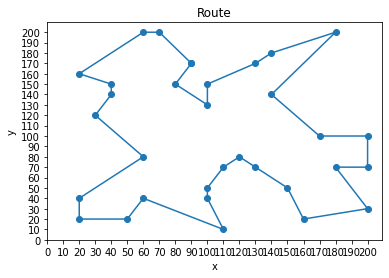

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Simulated annealing solver for the optimal route between a set of points
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------
import time
import random
import math

import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------------------------------------------------------------------------
#   Class definitions
#------------------------------------------------------------------------------------------------------------------

class Route(object):
    """ 
        Class that represents n points connected by straight lines to form a closed route.         
    """
    
    def __init__(self, points, randomize = True):
        """ 
            This constructor initializes the route. 

            points: The points that form the closed route.
            randomize: True indicates that the initial order of the points is randomized.
        """
        self.n = len(points)
        self.points = []
        for p in points:
            self.points.append([p[0], p[1]])

        if (randomize):
            random.shuffle(self.points)

    def show_points(self):        
        """ This method shows the points. """               
        x = [i[0] for i in self.points]
        y = [i[1] for i in self.points]
        plt.scatter(x, y)
        plt.title('Points')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xticks(np.arange(0, 201, 10))
        plt.yticks(np.arange(0, 201, 10))
        plt.show()        
    
    def show_route(self):
        """ This method shows the route. """ 
        x = [i[0] for i in self.points]
        y = [i[1] for i in self.points]
        plt.scatter(x, y)        
        
        x.append(self.points[0][0])
        y.append(self.points[0][1])
        plt.plot(x, y)
        plt.title('Route')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xticks(np.arange(0, 201, 10))
        plt.yticks(np.arange(0, 201, 10))
        plt.show()

    def cost(self):
        """ This method calculates the cost of the current route. """
        d = 0
        n = len(self.points)

        for i in range(self.n):
            if i < self.n-1:
                d += math.sqrt((self.points[i][0] - self.points[i+1][0])**2 + (self.points[i][1] - self.points[i+1][1])**2)
            else:
                d += math.sqrt((self.points[i][0] - self.points[0][0])**2 + (self.points[i][1] - self.points[0][1])**2)

        return d

    def neighbor(self):
        """ This method returns an instance like this one but with one random move made. """        
        
        # Copy current route
        new_route = Route(self.points, False)       
             
        # Select one random point to move to another position
        point1 = random.choice(range(new_route.n))
        
        # Select another point to move to the position of point1
        point2 = random.choice(range(new_route.n))
        while point2 == point1:
            point2 = random.choice(range(new_route.n))

        # Update order of points
        new_route.points[point1][0], new_route.points[point2][0] = new_route.points[point2][0], new_route.points[point1][0]
        new_route.points[point1][1], new_route.points[point2][1] = new_route.points[point2][1], new_route.points[point1][1]

        return new_route
    
                                       
#------------------------------------------------------------------------------------------------------------------
#   Program
#------------------------------------------------------------------------------------------------------------------
random.seed(time.time()*1000)

points = [[20, 20], [20, 40], [20, 160], [30, 120], [40, 140], [40, 150], [50, 20], [60, 40],[60, 80], \
    [60, 200], [70, 200], [80, 150], [90, 170], [90, 170],[100, 50], [100, 40], [100, 130],[100, 150], \
    [110, 10], [110, 70], [120, 80], [130, 70], [130, 170], [140, 140], [140, 180], [150, 50], \
    [160, 20], [170, 100], [180, 70], [180, 200], [200, 30], [200, 70], [200, 100]]

route = Route(points, True) # Initialize route
route.show_points()
route.show_route()

cost = route.cost()         # Initial cost    
step = 0                    # Step count

alpha = 0.99995             # Coefficient of the exponential temperature schedule        
t0 = 20                     # Initial temperature
t = t0    

while t > 0.5 and cost > 0:

    # Calculate temperature
    t = t0 * math.pow(alpha, step)
    step += 1
        
    # Get random neighbor
    neighbor = route.neighbor()
    new_cost = neighbor.cost()

    # Test neighbor
    if new_cost < cost:
        route = neighbor
        cost = new_cost
    else:
        # Calculate probability of accepting the neighbor
        p = math.exp(-(new_cost - cost)/t)
        if p >= random.random():
            route = neighbor
            cost = new_cost

    print("Iteration: ", step, "    Cost: ", cost, "    Temperature: ", t)

print("--------Solution-----------")
route.show_route()         


#------------------------------------------------------------------------------------------------------------------
#   End of file
#--------------------

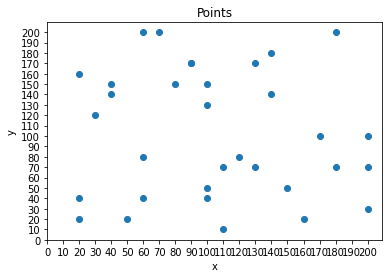

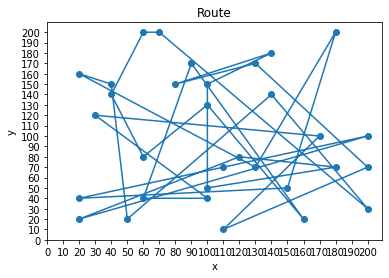

Se han truncado las últimas 5000 líneas del flujo de salida.
Iteration:  15002     Cost:  1382.4997315787798
Iteration:  15003     Cost:  1382.4997315787798
Iteration:  15004     Cost:  1382.4997315787798
Iteration:  15005     Cost:  1382.4997315787798
Iteration:  15006     Cost:  1382.4997315787798
Iteration:  15007     Cost:  1382.4997315787798
Iteration:  15008     Cost:  1382.4997315787798
Iteration:  15009     Cost:  1382.4997315787798
Iteration:  15010     Cost:  1382.4997315787798
Iteration:  15011     Cost:  1382.4997315787798
Iteration:  15012     Cost:  1382.4997315787798
Iteration:  15013     Cost:  1382.4997315787798
Iteration:  15014     Cost:  1382.4997315787798
Iteration:  15015     Cost:  1382.4997315787798
Iteration:  15016     Cost:  1382.4997315787798
Iteration:  15017     Cost:  1382.4997315787798
Iteration:  15018     Cost:  1382.4997315787798
Iteration:  15019     Cost:  1382.4997315787798
Iteration:  15020     Cost:  1382.4997315787798
Iteration:  15021     Cost:

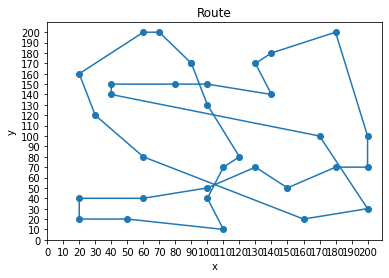

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Greedy search algorithm for the optimal route for a set of points
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------
import time
import random
import math

import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------------------------------------------------------------------------
#   Class definitions
#------------------------------------------------------------------------------------------------------------------

class Route(object):
    """ 
        Class that represents n points connected by straight lines to form a closed route.         
    """
    
    def __init__(self, points, randomize = True):
        """ 
            This constructor initializes the route. 

            points: The points that form the closed route.
            randomize: True indicates that the initial order of the points is randomized.
        """
        self.n = len(points)
        self.points = []
        for p in points:
            self.points.append([p[0], p[1]])

        if (randomize):
            random.shuffle(self.points)

    def show_points(self):        
        """ This method shows the points. """               
        x = [i[0] for i in self.points]
        y = [i[1] for i in self.points]
        plt.scatter(x, y)
        plt.title('Points')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xticks(np.arange(0, 201, 10))
        plt.yticks(np.arange(0, 201, 10))
        plt.show()        
    
    def show_route(self):
        """ This method shows the route. """ 
        x = [i[0] for i in self.points]
        y = [i[1] for i in self.points]
        plt.scatter(x, y)        
        
        x.append(self.points[0][0])
        y.append(self.points[0][1])
        plt.plot(x, y)
        plt.title('Route')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xticks(np.arange(0, 201, 10))
        plt.yticks(np.arange(0, 201, 10))
        plt.show()

    def cost(self):
        """ This method calculates the cost of the current route. """
        d = 0        

        for i in range(self.n):
            if i < self.n-1:
                d += math.sqrt((self.points[i][0] - self.points[i+1][0])**2 + (self.points[i][1] - self.points[i+1][1])**2)
            else:
                d += math.sqrt((self.points[i][0] - self.points[0][0])**2 + (self.points[i][1] - self.points[0][1])**2)

        return d

    def neighbor(self):
        """ This method returns an instance like this one but with one random move made. """        
        
        # Copy current route
        new_route = Route(self.points, False)       
             
        # Select one random point to move to another position
        point1 = random.choice(range(new_route.n))
        
        # Select another point to move to the position of point1
        point2 = random.choice(range(new_route.n))
        while point2 == point1:
            point2 = random.choice(range(new_route.n))

        # Update order of points
        new_route.points[point1][0], new_route.points[point2][0] = new_route.points[point2][0], new_route.points[point1][0]
        new_route.points[point1][1], new_route.points[point2][1] = new_route.points[point2][1], new_route.points[point1][1]

        return new_route
    
                                       
#------------------------------------------------------------------------------------------------------------------
#   Program
#------------------------------------------------------------------------------------------------------------------
random.seed(time.time()*1000)

points = [[20, 20], [20, 40], [20, 160], [30, 120], [40, 140], [40, 150], [50, 20], [60, 40],[60, 80], \
    [60, 200], [70, 200], [80, 150], [90, 170], [90, 170],[100, 50], [100, 40], [100, 130],[100, 150], \
    [110, 10], [110, 70], [120, 80], [130, 70], [130, 170], [140, 140], [140, 180], [150, 50], \
    [160, 20], [170, 100], [180, 70], [180, 200], [200, 30], [200, 70], [200, 100]]

route = Route(points, True) # Initialize route
route.show_points()
route.show_route()

cost = route.cost()         # Initial cost    
step = 0                    # Step count

while step < 20000 and cost > 0:
    
    step += 1

    # Get random neighbor
    neighbor = route.neighbor()
    new_cost = neighbor.cost()

    # Test neighbor
    if new_cost < cost:
        route = neighbor
        cost = new_cost    

    print("Iteration: ", step, "    Cost: ", cost)

print("--------Solution-----------")
route.show_route()       

#------------------------------------------------------------------------------------------------------------------
#   End of file
#----------------------------------------------------------------